<a href="https://colab.research.google.com/github/exp0nent/Kaggle_Practice/blob/main/Recommendation_Engine_Using_Netflix_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset
#Around100M+ ratings 4499 movies 480,000 users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Google_COLAB/combined_data_1.txt/combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [40]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [41]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [42]:

# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [43]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [44]:

netflix_dataset.shape

(24058263, 2)

In [45]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]

In [46]:
movie_count

np.int64(4499)

In [47]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [48]:
customer_count #considering movie Id also in nunique so we have to substract movie count

475257

In [49]:
#without NaN values
customer_count=customer_count-movie_count
customer_count

np.int64(470758)

In [50]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

np.int64(24053764)

In [51]:
# netflix_dataset['Rating'].count()


In [52]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [53]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


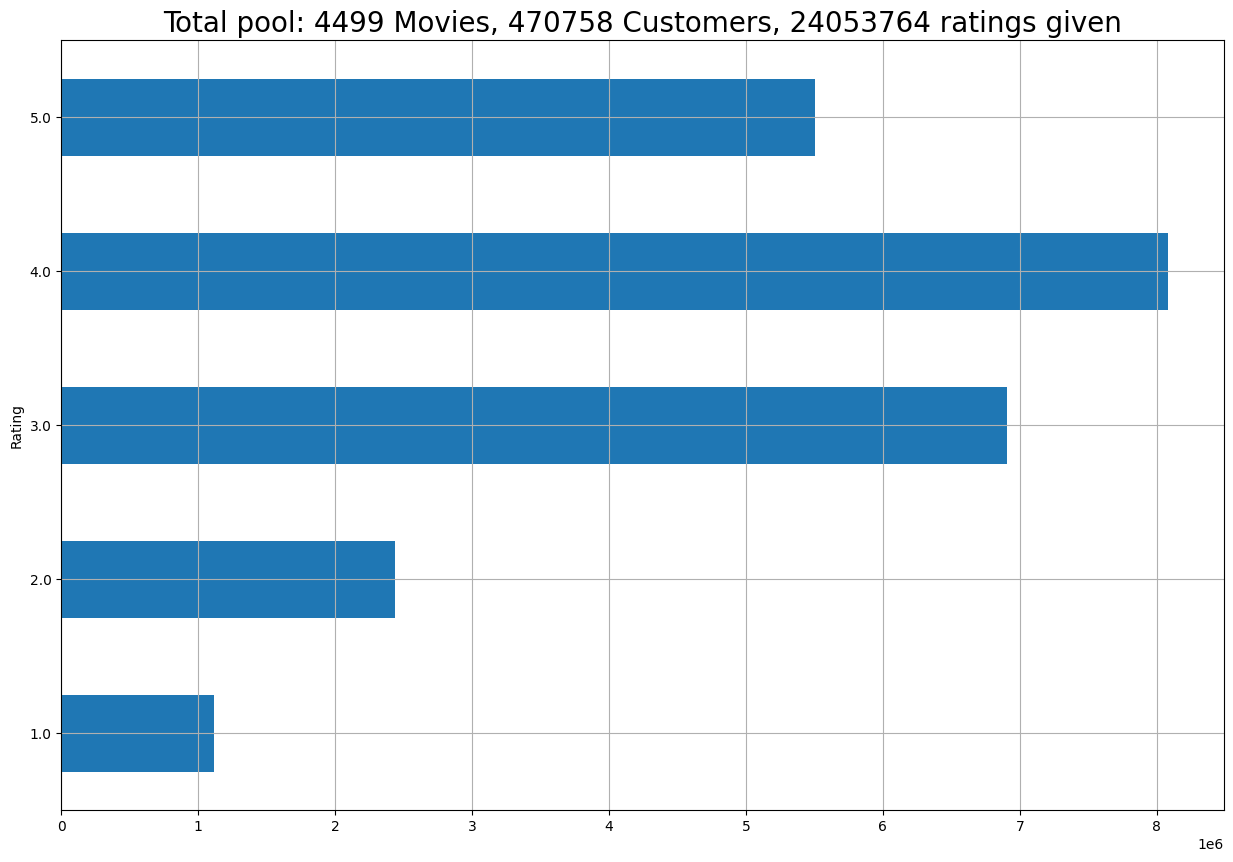

In [54]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [55]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [56]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [57]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [58]:
df_nan.shape

(4499, 1)

In [59]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [60]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [61]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [62]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [31]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)

In [36]:
temp

array([[4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 

In [32]:
i-j-1

269

In [33]:
len(netflix_dataset)

24058263

In [34]:
 df_nan.iloc[-1,0]   #last row, first column

np.int64(24057834)

In [35]:
24053764-24057834

-4070

In [63]:
24053764-24057834-1

-4071

In [64]:
# netflix_dataset

In [65]:
df_nan['index'][1:]


,index
1,548
2,694
3,2707
4,2850
5,3991
...,...
4494,24046714
4495,24047329
4496,24056849
4497,24057564


In [66]:
df_nan['index'][:-1]

,index
0,0
1,548
2,694
3,2707
4,2850
...,...
4493,24046583
4494,24046714
4495,24047329
4496,24056849


In [67]:
# df_nan.iloc[-1,0]-1

In [68]:
# len(netflix_dataset)

In [69]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [70]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [71]:
# temp=np.full((1,547), 1) #(shape, fill_value)

In [72]:
# print(temp)

In [73]:
movie_np[-20:-1]

array([4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499.])

In [74]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


/tmp/ipython-input-3436558489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [75]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [76]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
# f=['count','mean']

In [77]:
# dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [78]:
# dataset_movie_summary

In [79]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [80]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [81]:
# the movies having less ratings count and the customers who have given the less ratings will not be considered

In [82]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [83]:
dataset_movie_summary["count"].quantile(0.7)

np.float64(1798.6)

In [84]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

np.float64(1799.0)

In [85]:
dataset_movie_summary['count']

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [86]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list
#considering only the index of those movies whose ratings are less then the benchmark

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [87]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [88]:
# dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [89]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

np.float64(52.0)

In [90]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

In [91]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [92]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [93]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [94]:
import pandas as pd

In [96]:
df_title = pd.read_csv("/content/drive/MyDrive/Google_COLAB/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [97]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [98]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2611312 sha256=eacc6a382bce85357c76a43c4e74fa5d872d20fa2cc4267883a85a630fba4606
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD    #dataset class is used to load and manage the datasets for recommendation
# tasks.
from surprise.model_selection import cross_validate

In [ ]:
#!pip install scikit-surprise

In [ ]:
#help us to read the dataset for svd algo
reader=Reader()

In [ ]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[:100000], reader)

In [ ]:
data

In [ ]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

In [ ]:
netflix_dataset.head()

In [ ]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] =="712664")&(netflix_dataset['Rating']==5)]
# dataset_712664=dataset_712664.set_index('Movie_Id')
# dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

In [ ]:
df_title

In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

In [ ]:
user_712664=user_712664.reset_index()
user_712664

In [ ]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

In [ ]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

In [ ]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

In [ ]:
user_712664.head(10)

In [ ]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))